In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

https://github.com/Bhasfe/titanic/blob/master/Titanic.ipynb   
https://www.kaggle.com/code/alexisbcook/titanic-tutorial

In [ ]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/Jaewon0702/Machine_Learning_Class/refs/heads/main/titanic.csv') #header = None
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


# 1. Exploratory Data Analysis

In [ ]:
display(df_titanic.head())

print(df_titanic.info())
print(df_titanic.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:
corr_matrix = df_titanic.corr(numeric_only = True)
corr_matrix["Survived"].sort_values(ascending = False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


## Survived

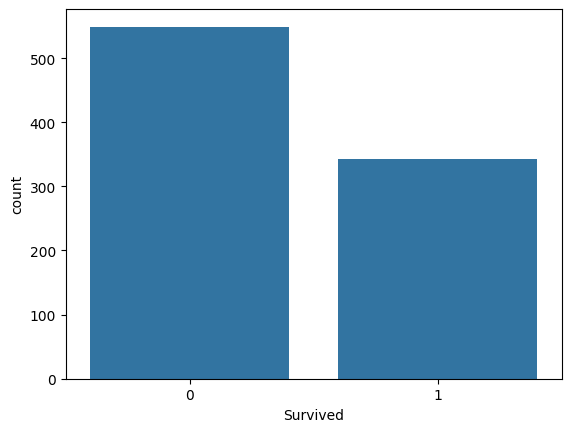

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [ ]:
# Visualize with a countplot
sns.countplot(x="Survived", data=df_titanic)
plt.show()

# Print the proportions
print(df_titanic["Survived"].value_counts(normalize=True))

## PClass: 사회적 지위  
1 = Upper
2 = Middle
3 = Lower  
낮은 사회 계층의 사람이 많이 죽었다.  
높은 계층의 생존율이 높다.

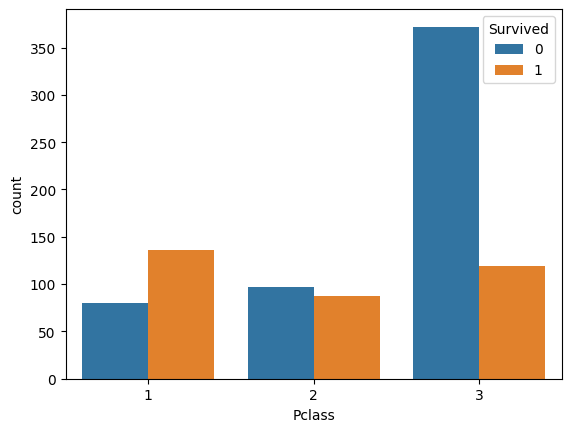

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=df_titanic)
plt.show()

# Proportion of people survived for each class
print(df_titanic["Survived"].groupby(df_titanic["Pclass"]).mean())

# How many people we have in each class?
print(df_titanic["Pclass"].value_counts())

## Age

20-30 나이에 가까울수록 생존율이 높다.

<ipython-input-7-4d1f75ee5c21>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic[df_titanic.Survived==1]["Age"],color="y", bins=7, label="1")
<ipython-input-7-4d1f75ee5c21>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic[df_titanic.Survived==0]["Age"], bins=7, label="0")


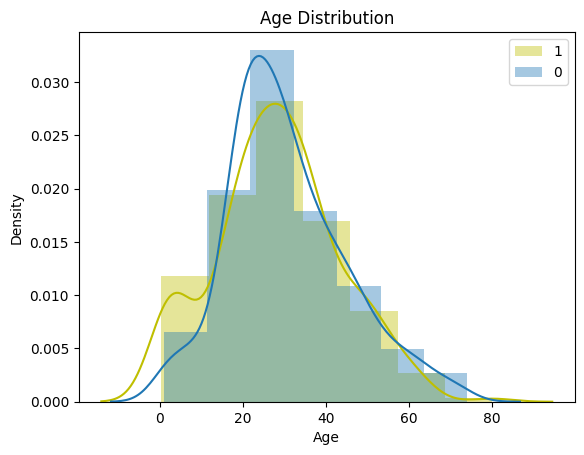

In [ ]:
# Survived by age
sns.distplot(df_titanic[df_titanic.Survived==1]["Age"],color="y", bins=7, label="1")

# Death by age
sns.distplot(df_titanic[df_titanic.Survived==0]["Age"], bins=7, label="0")
plt.legend()
plt.title("Age Distribution")
plt.show()

## Sex

남자의 생존률(0.188908)이 낮고, 여자의 생존률은 상대적으로 높다(0.742038).

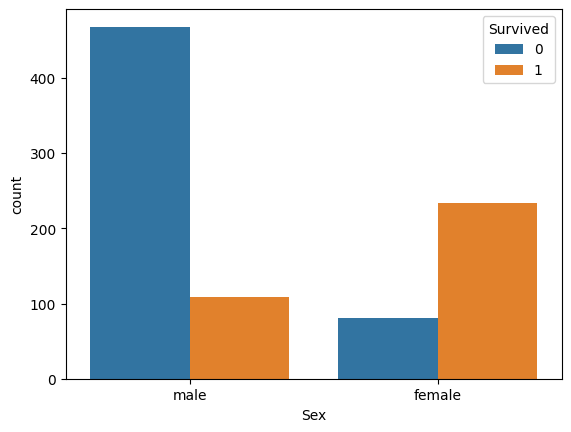

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64


In [ ]:
# Visualize with a countplot
sns.countplot(x="Sex", hue="Survived", data=df_titanic)
plt.show()

# Proportion of people survived for each class
print(df_titanic["Survived"].groupby(df_titanic["Sex"]).mean())

# How many people we have in each class?
print(df_titanic["Sex"].value_counts())

## SibSp & Parch  
SibSp = Sibling or Spouse number  
Parch = Parent or Children number  

가족 수가 3명, 2명, 1명 순으로 생존율이 높다.

big family = if family size > 3  
small family = if family size > 0 and family size < =3  
alone = family size == 0  

In [ ]:
df_titanic["family_size"] = df_titanic["SibSp"] + df_titanic["Parch"]
print(df_titanic["family_size"].value_counts())

# Proportion of people survived for each class
print(df_titanic["Survived"].groupby(df_titanic["family_size"]).mean().sort_values(ascending=False))

family_size
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64
family_size
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
7     0.000000
10    0.000000
Name: Survived, dtype: float64


<ipython-input-11-580d640504bc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic[df_titanic.Survived==1]["family_size"],color="y", bins=10, label="1")
<ipython-input-11-580d640504bc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic[df_titanic.Survived==0]["family_size"], bi

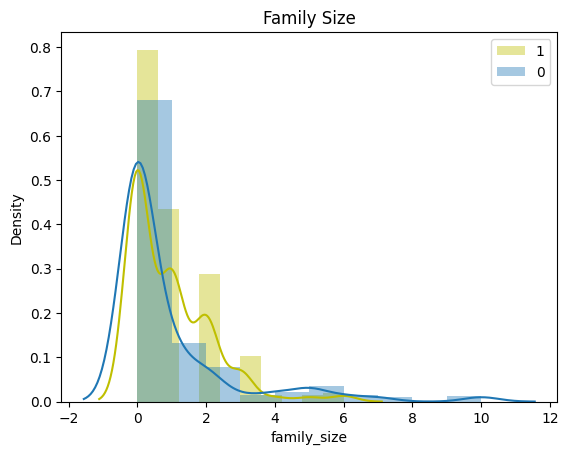

In [ ]:
# Survived by age
sns.distplot(df_titanic[df_titanic.Survived==1]["family_size"],color="y", bins=10, label="1")

sns.distplot(df_titanic[df_titanic.Survived==0]["family_size"], bins=10, label="0")
plt.legend()
plt.title("Family Size")
plt.show()

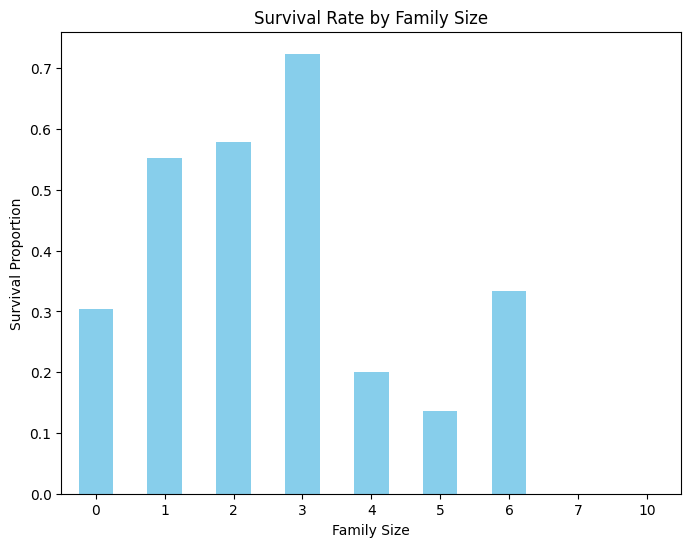

In [ ]:
import matplotlib.pyplot as plt

# Calculate the survival rate by family size
survival_by_family_size = df_titanic["Survived"].groupby(df_titanic["family_size"]).mean()

# Plotting the proportion graph
plt.figure(figsize=(8, 6))
survival_by_family_size.plot(kind='bar', color='skyblue')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Proportion")
plt.xticks(rotation= 0)
plt.show()


## Fare

Fare와 Survived 사이에는 0.257 정도의 상관관계가 있다.

<ipython-input-10-d9f130f282ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic["Fare"])


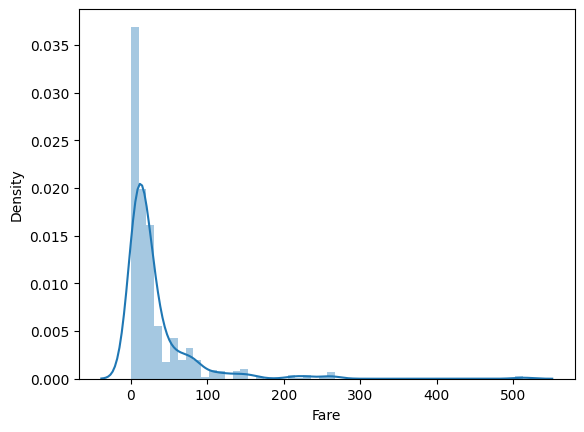

In [ ]:
# Plot the histogram
sns.distplot(df_titanic["Fare"])
plt.show()

In [ ]:
corr_matrix = df_titanic.corr(numeric_only = True)
corr_matrix["Survived"].sort_values(ascending = False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
family_size,0.016639
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


## Cabin

## Embarked

Embarked is a categorical features which shows us the port of embarkation.  

C = Cherbourg, Q = Queenstown, S = Southampton

Cherbourg에서 탄 사람들이 55%의 높은 생존율을 보인다.  
반면 나머지 Queenstown과 Southampton에서 탄 승객들은 38, 33%의 생존율을 보였다.

승객들이 승선한 지역

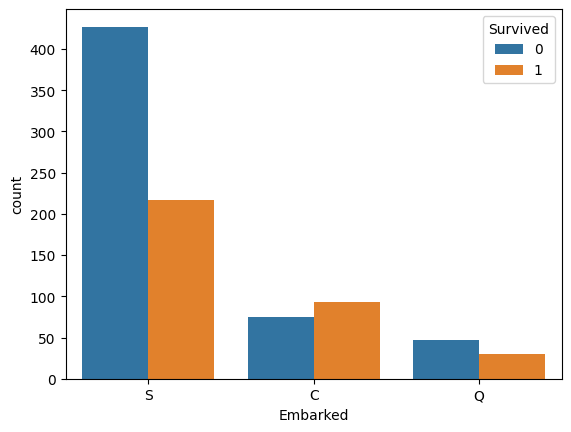

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [ ]:
# Make a countplot
sns.countplot(x="Embarked", hue="Survived", data=df_titanic)
plt.show()

# Print the value counts
print(df_titanic["Embarked"].value_counts())

# Surviving rates of Embarked
print(df_titanic["Survived"].groupby(df_titanic["Embarked"]).mean())

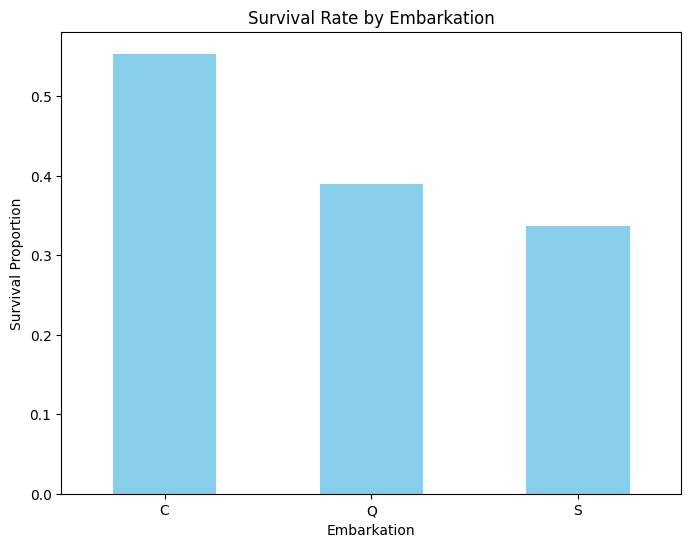

In [ ]:
import matplotlib.pyplot as plt

# Calculate the survival rate by family size
survival_by_family_size = df_titanic["Survived"].groupby(df_titanic["Embarked"]).mean()

# Plotting the proportion graph
plt.figure(figsize=(8, 6))
survival_by_family_size.plot(kind='bar', color='skyblue')
plt.title("Survival Rate by Embarkation")
plt.xlabel("Embarkation")
plt.ylabel("Survival Proportion")
plt.xticks(rotation= 0)
plt.show()

# Feature Engineering

코드는 정리할 필요 없고 결과만 잘 정리해서 엑셀로 내..  
테이블에 결과 및 간단한 설명...

참고: https://seo00.tistory.com/60

데이터전처리, 데이터 표준화, 차원축소 1회 이상, 그리드서치(1회 이상), 교차검증, 분류기(10가지 분류방법 이용)

PassengerId, Name, Ticket,Cabin을 삭제하였다.

In [ ]:
df_titanic_eld = df_titanic.drop(df_titanic.columns[[0,3,8,10]], axis=1)
df_titanic_eld.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


 Sex에 따른 차이

In [ ]:
women = df_titanic.loc[df_titanic.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = df_titanic.loc[df_titanic.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


 우선 null 값을 채우자  
 Embarked는 frequent로 채우고, Cabin은 그냥 삭제하자..  
 Age는 IterativeImputer 이용!

In [ ]:
# Embarked
freq_columns = ['Embarked']
imputer_freq = SimpleImputer(strategy = "most_frequent")
imputer_freq.fit(df_titanic_eld[freq_columns])
df_titanic_eld[freq_columns] = imputer_freq.transform(df_titanic_eld[freq_columns])

# Age
imp_age = IterativeImputer(max_iter=100, random_state=34, n_nearest_features=2)
df_titanic_eld["Age"] = np.round(imp_age.fit_transform(df_titanic_eld[["Age"]]))
df_titanic_eld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Encode Sex

In [ ]:
# Initialize a Label Encoder
le = LabelEncoder()
# Encode Sex
df_titanic_eld["Sex"] = le.fit_transform(df_titanic_eld[["Sex"]].values.ravel())

In [ ]:
df_titanic_eld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


Define family size

In [ ]:
df_titanic_eld["family_size"] = df_titanic_eld["SibSp"] + df_titanic_eld["Parch"]

In [ ]:
def assign_passenger_label(family_size):
    if family_size == 0:
        return "Alone"
    elif family_size <=3:
        return "Small_family"
    else:
        return "Big_family"

In [ ]:
df_titanic_eld["family_size"] = df_titanic_eld["family_size"].apply(assign_passenger_label)

In [ ]:
df_titanic_eld["family_size"].head(10)

,family_size
0,Small_family
1,Small_family
2,Alone
3,Small_family
4,Alone
5,Alone
6,Alone
7,Big_family
8,Small_family
9,Small_family


One Hot Encoding

In [ ]:
df_titanic_eld = pd.get_dummies(columns=["Pclass", "Embarked", "family_size"], data=df_titanic_eld, drop_first=True)

나머지 필요없는 데이터 지우자

In [ ]:
target = df_titanic_eld["Survived"]
df_titanic_eld.drop(["SibSp", "Parch"], axis=1, inplace=True)

In [ ]:
display(df_titanic_eld.head())
print(df_titanic_eld.info())

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,family_size_Big_family,family_size_Small_family
0,0,1,22.0,7.2500,False,True,False,True,False,True
1,1,0,38.0,71.2833,False,False,False,False,False,True
2,1,0,26.0,7.9250,False,True,False,True,False,False
3,1,0,35.0,53.1000,False,False,False,True,False,True
4,0,1,35.0,8.0500,False,True,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Survived                  891 non-null    int64  
 1   Sex                       891 non-null    int64  
 2   Age                       891 non-null    float64
 3   Fare                      891 non-null    float64
 4   Pclass_2                  891 non-null    bool   
 5   Pclass_3                  891 non-null    bool   
 6   Embarked_Q                891 non-null    bool   
 7   Embarked_S                891 non-null    bool   
 8   family_size_Big_family    891 non-null    bool   
 9   family_size_Small_family  891 non-null    bool   
dtypes: bool(6), float64(2), int64(2)
memory usage: 33.2 KB
None


In [ ]:
df_titanic_eld.isnull().sum()
#null은 Age,Cabon, Embarked가 있네..

,0
Survived,0
Sex,0
Age,0
Fare,0
Pclass_2,0
Pclass_3,0
Embarked_Q,0
Embarked_S,0
family_size_Big_family,0
family_size_Small_family,0


# 데이터 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler
columns_std = ['Age', 'Fare']
# Let's standardize the data
sc = StandardScaler()
X_std = sc.fit_transform(df_titanic_eld[columns_std])
df_titanic_std = pd.DataFrame(X_std, columns = df_titanic_eld[columns_std].columns,
                    index = df_titanic_eld[columns_std].index)
# Return data to train and test set
for col in columns_std:
    df_titanic_eld[col] = df_titanic_std.iloc[: len(df_titanic_eld)][col]

print(df_titanic_eld)

     Survived  Sex       Age      Fare  Pclass_2  Pclass_3  Embarked_Q  \
0           0    1 -0.596775 -0.502445     False      True       False   
1           1    0  0.634607  0.786845     False     False       False   
2           1    0 -0.288929 -0.488854     False      True       False   
3           1    0  0.403723  0.420730     False     False       False   
4           0    1  0.403723 -0.486337     False      True       False   
..        ...  ...       ...       ...       ...       ...         ...   
886         0    1 -0.211968 -0.386671      True     False       False   
887         1    0 -0.827659 -0.044381     False     False       False   
888         0    0  0.018916 -0.176263     False      True       False   
889         1    1 -0.288929 -0.044381     False     False       False   
890         0    1  0.172839 -0.492378     False      True        True   

     Embarked_S  family_size_Big_family  family_size_Small_family  
0          True                   False    

## Train & Test data로 분리

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_titanic_eld.iloc[:, 1:].values, df_titanic_eld.iloc[:, 0].values

#X_Train은 label 제외 나머지 데이터의 70%, X_test는 30%, y_는 label
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)

## 차원 축소

공분산 행렬의 고윳값 분해

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.38640677, 0.28963234, 0.10134835, 0.07493428, 0.05429274,
       0.05079031, 0.01673337, 0.01400571, 0.01185613])

plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

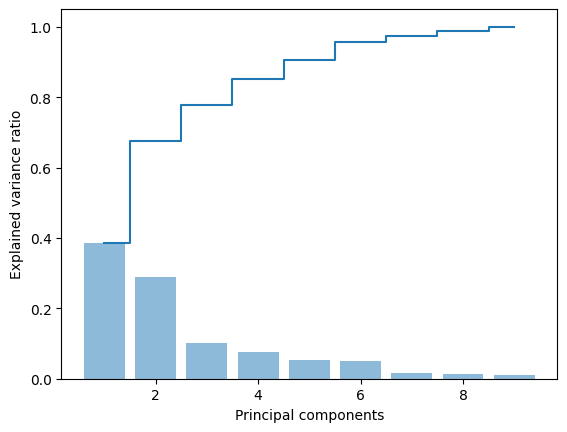

In [ ]:
plt.bar(range(1, 10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [ ]:
import numpy as np

# Convert X_train to a numeric dtype before calculating covariance
X_train_numeric = X_train.astype(np.float64)  # Or any suitable numeric dtype

cov_mat = np.cov(X_train_numeric.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [ ]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유벡터) 튜플을 정렬합니다
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

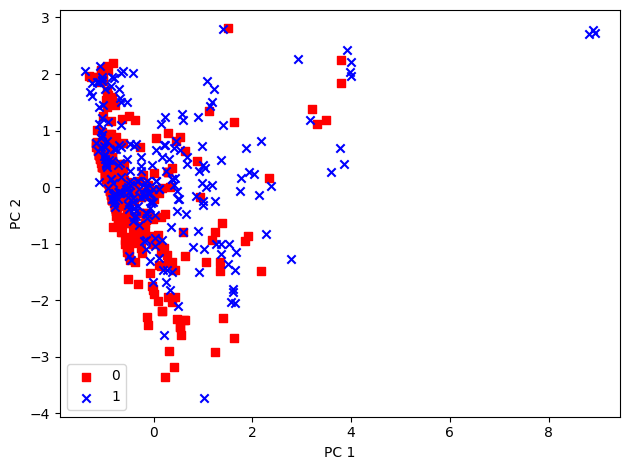

In [ ]:
X_train_pca = X_train_numeric.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

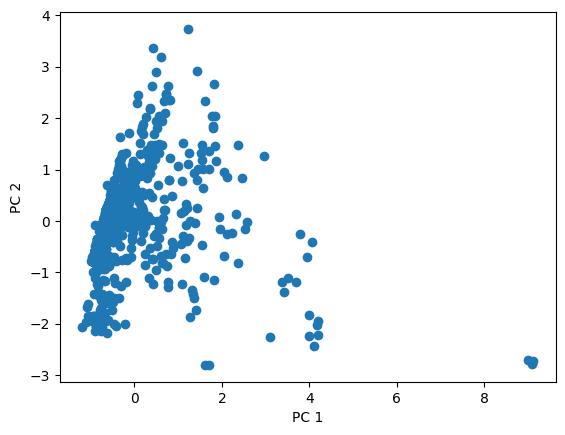

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', '>', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [ ]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=4) # 시험: n_components로 주성분 개수 조절하고 confusion_matrix로 성능 측정
#ex) n_components로 주성분 개수 5개일 때 F1 score? 문제..
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_pca, y_train)

In [ ]:
### Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 모델 성능 평가하기
y_pred = lr.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
dm = classification_report(y_test, y_pred)
print("%s \n %s" %(cm, dm))

[[144  21]
 [ 38  65]] 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       165
           1       0.76      0.63      0.69       103

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.78      0.78      0.78       268



ValueError: could not broadcast input array from shape (3,4) into shape (2,4)

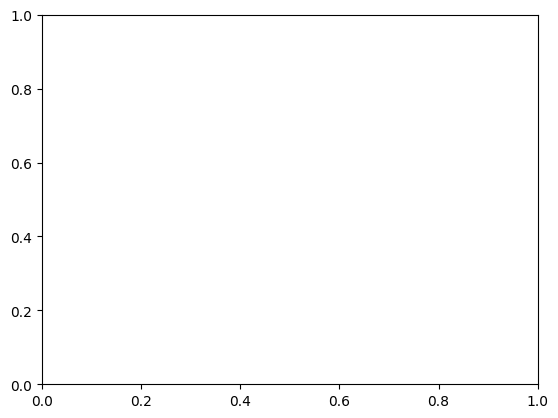

In [ ]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', '>', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # 수정: np.unique(y)를 사용하여 고유한 클래스 수를 확인하고 cmap 크기를 조정합니다.
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Define markers and colors
    markers = ('s', '>', 'o', '^', 'v')
    # Define colors as RGB values
    colors = ([1, 0, 0], [0, 0, 1], [0.5, 1, 0.5], [0.5, 0.5, 0.5], [0, 1, 1])
    # Create ListedColormap with RGB values
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=[colors[idx]], # Pass color as a list for scatter
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # Highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

## 그리드 서치

그리드 서치를 사용한 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8089349718381976
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [ ]:
print('테스트 정확도: %.3f' % gs.score(X_test, y_test))

테스트 정확도: 0.817


## 교차 검증

중첩 교차 검증을 사용한 알고리즘 선택

In [ ]:
from sklearn.model_selection import cross_val_score


gs1 = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  return_train_score=True,
                  refit=True,
                  cv=2)

scores = cross_val_score(gs1, X_train, y_train,
                         scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV 정확도: 0.807 +/- 0.028


In [ ]:
from sklearn.tree import DecisionTreeClassifier

gs2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=5)

scores = cross_val_score(gs2, X_train, y_train,
                         scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV 정확도: 0.817 +/- 0.010


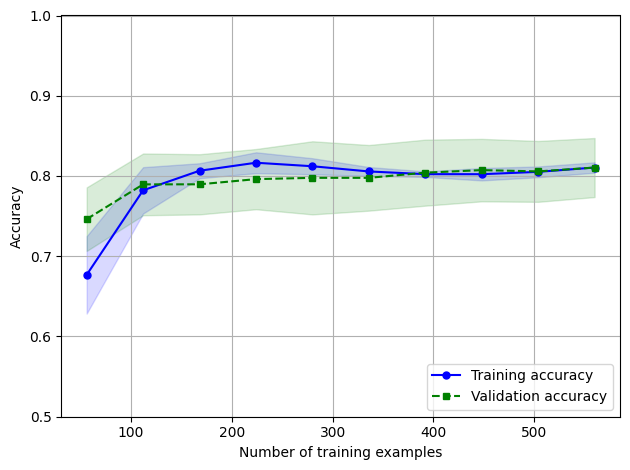

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

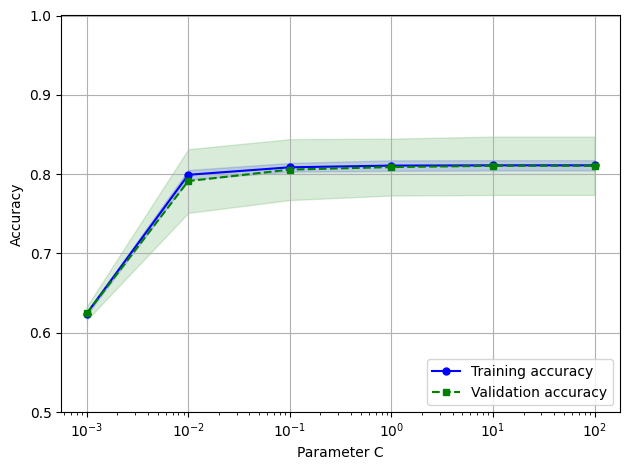

In [ ]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr,
                X=X_train,
                y=y_train,
                param_name='logisticregression__C',
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8591735561010921
{'svc__C': 10.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

정밀도: 0.756
재현율: 0.631
F1: 0.688


In [ ]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8531712380133737
{'svc__C': 10.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


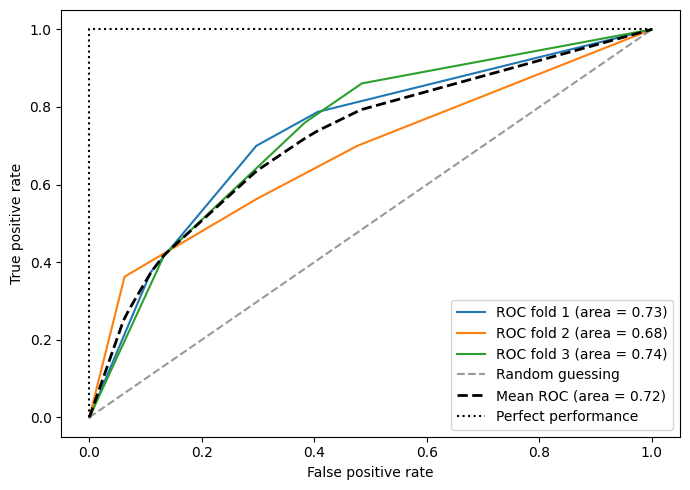

In [ ]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.model_selection import StratifiedKFold

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

X_train2 = X_train[:, [4, 8]]


cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

## 분류기

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(penalty='l2',
                          C=0.001,
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

print('10-겹 교차 검증:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-겹 교차 검증:

ROC AUC: 0.84 (+/- 0.03) [Logistic regression]
ROC AUC: 0.76 (+/- 0.05) [Decision tree]
ROC AUC: 0.76 (+/- 0.06) [KNN]


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[
    ('lr', pipe1), ('dt', clf2), ('knn', pipe3)], voting='soft') # voting='soft' predict_proba 지원

scores = cross_validate(estimator=vc, X=X_train, y=y_train,
                        cv=10, scoring='roc_auc')
print("ROC AUC: : %0.2f (+/- %0.2f) [%s]"
      % (scores['test_score'].mean(),
         scores['test_score'].std(), 'VotingClassifier'))

ROC AUC: : 0.85 (+/- 0.05) [VotingClassifier]


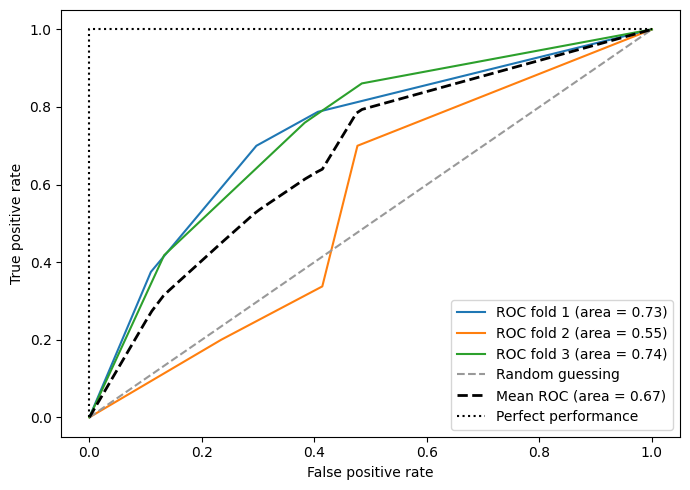

In [ ]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.model_selection import StratifiedKFold

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

X_train2 = X_train[:, [4, 8]]


cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    probas = vc.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('결정 트리의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('배깅의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (bag_train, bag_test))

결정 트리의 훈련 정확도/테스트 정확도 0.982/0.791
배깅의 훈련 정확도/테스트 정확도 0.982/0.854


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(penalty='l2',
                          C=0.001,
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

print('10-겹 교차 검증:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-겹 교차 검증:

ROC AUC: 0.84 (+/- 0.03) [Logistic regression]
ROC AUC: 0.76 (+/- 0.05) [Decision tree]
ROC AUC: 0.76 (+/- 0.06) [KNN]


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Initialize the classifiers
clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=1)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
clf4 = RandomForestClassifier(n_estimators=100, random_state=1)
clf5 = AdaBoostClassifier(estimator=tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1,
                         algorithm = "SAMME")
clf6 = GradientBoostingClassifier(n_estimators=100, random_state=1)
clf7 = BaggingClassifier(estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)
clf8 = SVC(kernel='linear', C=1, probability=True, random_state=1)
clf9 = GaussianNB()

# Define pipelines for models that require scaling
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
pipe8 = Pipeline([['sc', StandardScaler()], ['clf', clf8]])

# Combine classifiers and labels
all_clf = [pipe1, clf2, pipe3, clf4, clf5, clf6, clf7, pipe8, clf9]
clf_labels = [
    'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest',
    'AdaBoost', 'Gradient Boosting', 'Bagging', 'SVM', 'Naive Bayes'
]

# Cross-validation
print('10-Fold Cross-Validation:\n')
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))



10-Fold Cross-Validation:

ROC AUC: 0.84 (+/- 0.03) [Logistic Regression]
ROC AUC: 0.76 (+/- 0.05) [Decision Tree]
ROC AUC: 0.76 (+/- 0.06) [KNN]
ROC AUC: 0.86 (+/- 0.05) [Random Forest]
ROC AUC: 0.86 (+/- 0.04) [AdaBoost]
ROC AUC: 0.87 (+/- 0.05) [Gradient Boosting]
ROC AUC: 0.76 (+/- 0.05) [Bagging]
ROC AUC: 0.83 (+/- 0.04) [SVM]
ROC AUC: 0.83 (+/- 0.03) [Naive Bayes]


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

# Initialize the Voting Classifier with more estimators
vc = VotingClassifier(estimators=[
    ('lr', pipe1),           # Logistic Regression with scaling
    ('dt', clf2),            # Decision Tree
    ('knn', pipe3),          # KNN with scaling
    ('rf', clf4),            # Random Forest
    ('adb', clf5),           # AdaBoost
    ('gb', clf6),            # Gradient Boosting
    ('bag', clf7),           # Bagging
    ('svc', pipe8),          # SVM with scaling
    ('gnb', clf9)            # Gaussian Naive Bayes
], voting='soft')  # `voting='soft'` for probability-based voting

# Perform 10-fold cross-validation on the extended Voting Classifier
scores = cross_validate(estimator=vc, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("ROC AUC: %0.2f (+/- %0.2f) [%s]" %
      (scores['test_score'].mean(), scores['test_score'].std(), 'VotingClassifier'))


ROC AUC: 0.87 (+/- 0.05) [VotingClassifier]


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

# Initialize the Voting Classifier with more estimators
vc = VotingClassifier(estimators=[
    ('lr', pipe1),           # Logistic Regression with scaling
    ('dt', clf2),            # Decision Tree
    ('knn', pipe3),          # KNN with scaling
    ('rf', clf4),            # Random Forest
    ('gb', clf6),            # Gradient Boosting
    ('svc', pipe8),          # SVM with scaling
    ('gnb', clf9)            # Gaussian Naive Bayes
], voting='soft')  # `voting='soft'` for probability-based voting

# Perform 10-fold cross-validation on the extended Voting Classifier
scores = cross_validate(estimator=vc, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("ROC AUC: %0.2f (+/- %0.2f) [%s]" %
      (scores['test_score'].mean(), scores['test_score'].std(), 'VotingClassifier'))


ROC AUC: 0.88 (+/- 0.05) [VotingClassifier]


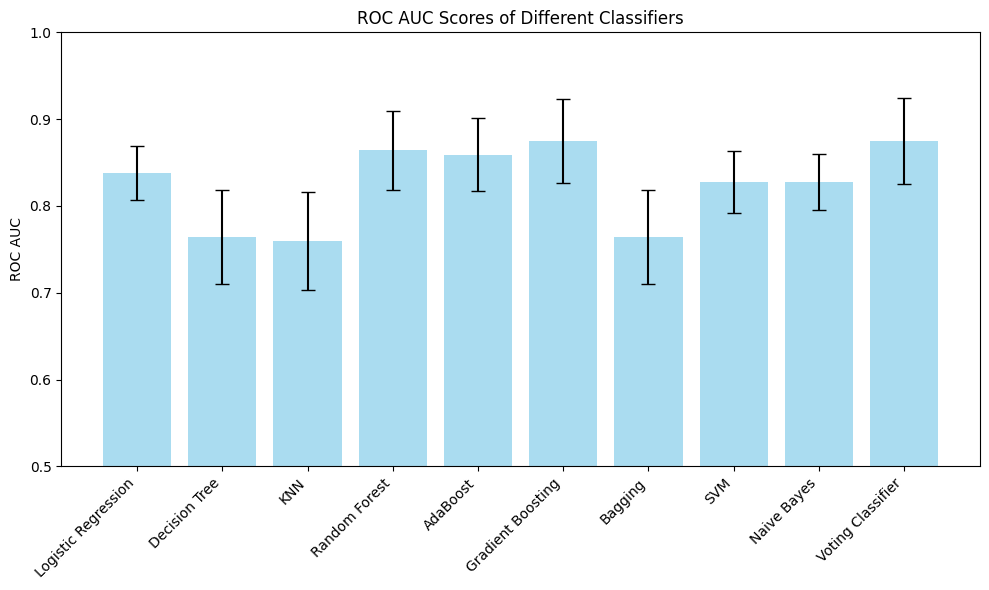

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

# Define classifiers as previously done
clf_labels = [
    'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest',
    'AdaBoost', 'Gradient Boosting', 'Bagging', 'SVM', 'Naive Bayes', 'Voting Classifier'
]
all_clf = [pipe1, clf2, pipe3, clf4, clf5, clf6, clf7, pipe8, clf9]

# Add the Voting Classifier as a combined model
vc = VotingClassifier(estimators=[
    ('lr', pipe1), ('dt', clf2), ('knn', pipe3), ('rf', clf4),
    ('adb', clf5), ('gb', clf6), ('bag', clf7), ('svc', pipe8), ('gnb', clf9)], voting='soft')
all_clf.append(vc)

# Store the mean and standard deviation of ROC AUC scores for each classifier
mean_scores = []
std_scores = []

# Calculate cross-validation scores
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Step 2: Plot ROC AUC results for each classifier
x_pos = np.arange(len(clf_labels))

plt.figure(figsize=(10, 6))
plt.bar(x_pos, mean_scores, yerr=std_scores, align='center', alpha=0.7, capsize=5, color='skyblue')
plt.xticks(x_pos, clf_labels, rotation=45, ha='right')
plt.ylabel('ROC AUC')
plt.title('ROC AUC Scores of Different Classifiers')
plt.ylim(0.5, 1.0)  # Assuming ROC AUC range between 0.5 and 1.0
plt.tight_layout()
plt.show()


In [ ]:
v = vc.fit(X_train, y_train)

In [ ]:
v.predict_proba(X_test[:10])

array([[0.82467433, 0.17532567],
       [0.25673472, 0.74326528],
       [0.82968315, 0.17031685],
       [0.26560497, 0.73439503],
       [0.49147659, 0.50852341],
       [0.2749716 , 0.7250284 ],
       [0.82560194, 0.17439806],
       [0.48218417, 0.51781583],
       [0.25350106, 0.74649894],
       [0.24235974, 0.75764026]])

ValueError: X has 2 features, but StandardScaler is expecting 9 features as input.

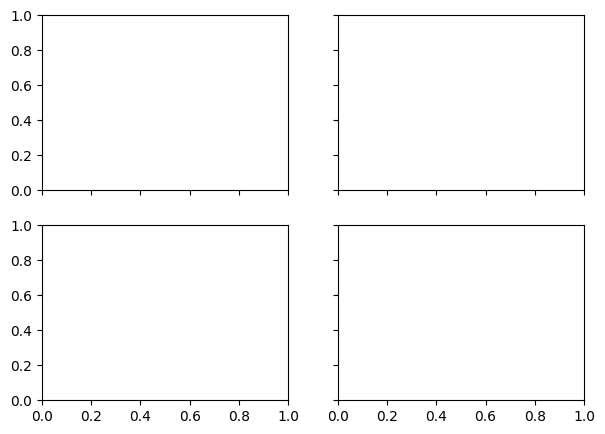

In [ ]:
from sklearn.preprocessing import StandardScaler
from itertools import product
from matplotlib import pyplot as plt

# Select only the first two features from X_train for visualization
X_train_2D = X_train[:, 1:3]  # Using the first two features only

# Initialize and fit a new StandardScaler on X_train_2D
scaler_2D = StandardScaler()
X_train_2D_std = scaler_2D.fit_transform(X_train)

clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'vc']
all_clf = [pipe1, clf2, pipe3, vc]

x_min = X_train_2D_std[:, 0].min() - 1
x_max = X_train_2D_std[:, 0].max() + 1
y_min = X_train_2D_std[:, 1].min() - 1
y_max = X_train_2D_std[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=2, ncols=2,
                        sharex='col',
                        sharey='row',
                        figsize=(7, 5))

for idx, clf, tt in zip(product([0, 1], [0, 1]), all_clf, clf_labels):
    clf.fit(X_train_2D_std, y_train)  # Train each classifier on 2D scaled data

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx[0], idx[1]].scatter(X_train_2D_std[y_train == 0, 0],
                                  X_train_2D_std[y_train == 0, 1],
                                  c='blue', marker='^', s=50)
    axarr[idx[0], idx[1]].scatter(X_train_2D_std[y_train == 1, 0],
                                  X_train_2D_std[y_train == 1, 1],
                                  c='green', marker='o', s=50)
    axarr[idx[0], idx[1]].set_title(tt)

plt.text(-3.5, -5., s='Feature 1 [standardized]', ha='center', va='center', fontsize=12)
plt.text(-12.5, 4.5, s='Feature 2 [standardized]', ha='center', va='center', fontsize=12, rotation=90)

plt.show()


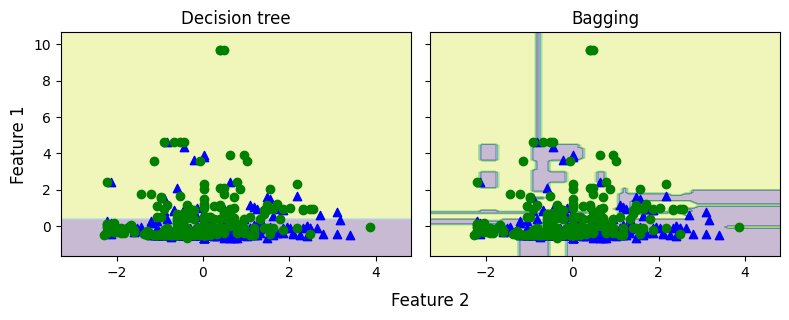

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select only the first two features from X_train for visualization
X_train_2D = X_train[:, 1:3]  # Using the first two features only

x_min = X_train_2D[:, 0].min() - 1
x_max = X_train_2D[:, 0].max() + 1
y_min = X_train_2D[:, 1].min() - 1
y_max = X_train_2D[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2,
                        sharex='col',
                        sharey='row',
                        figsize=(8, 3))

for idx, clf, tt in zip([0, 1],
                        [tree, bag],
                        ['Decision tree', 'Bagging']):
    # Train the classifier using only the two selected features
    clf.fit(X_train_2D, y_train)

    # Make predictions on the mesh grid using the trained model
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train_2D[y_train == 0, 0],
                       X_train_2D[y_train == 0, 1],
                       c='blue', marker='^')

    axarr[idx].scatter(X_train_2D[y_train == 1, 0],
                       X_train_2D[y_train == 1, 1],
                       c='green', marker='o')

    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Feature 1', fontsize=12)

plt.tight_layout()
plt.text(0, -0.2,
         s='Feature 2',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(estimator=tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1,
                         algorithm = "SAMME")

In [ ]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('결정 트리의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('에이다부스트의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (ada_train, ada_test))

결정 트리의 훈련 정확도/테스트 정확도 0.785/0.791
에이다부스트의 훈련 정확도/테스트 정확도 0.817/0.817


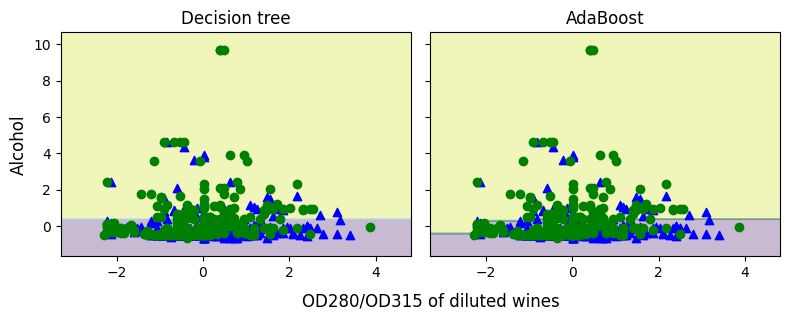

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select only the first two features for 2D visualization
X_train_2D = X_train[:,1:3]  # Assuming you want to use the first two features only
y_train = y_train  # Assuming y_train is already defined

# Define the grid for the contour plot
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Create subplots
f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))

# Train and visualize each classifier on the 2D data
for idx, clf, tt in zip([0, 1], [tree, ada], ['Decision tree', 'AdaBoost']):
    clf.fit(X_train_2D, y_train)  # Train with 2D data

    # Predict and reshape results for the contour plot
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and training points
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train_2D[y_train == 0, 0],
                       X_train_2D[y_train == 0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train_2D[y_train == 1, 0],
                       X_train_2D[y_train == 1, 1],
                       c='green', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)

# Additional text and layout adjustments
plt.tight_layout()
plt.text(0, -0.2,
         s='OD280/OD315 of diluted wines',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)

plt.show()
